In [1]:
# IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import (LogisticRegression, LinearRegression)
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# PUNTO 1.1
dataset = pd.read_csv('BankMarketingDataSet.csv', sep = ';')
#print('Prime cinque righe:\n  {}'.format(dataset.head()))
dataset.head()

,id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no
1,2,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no
2,3,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no
3,4,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no
4,5,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
# PUNTO 1.2
num_istanze = dataset.shape[0]
print('Numero istanze: {}'.format(num_istanze))

num_NaN_columns = dataset.isnull().sum()
num_NaN = num_NaN_columns.sum()
print('Numero istanze nulle: {}'.format(num_NaN))

# Conto i valori da predire
y_size = dataset.groupby('y').size()
y_no = y_size['no']
y_yes = y_size['yes']
print('Non bilanciato, YES: {}, NO: {}'.format(y_yes, y_no))

Numero istanze: 4119
Numero istanze nulle: 0
Non bilanciato, YES: 451, NO: 3668


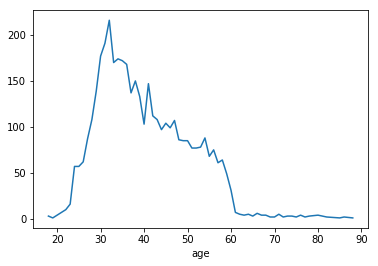

In [4]:
# PUNTO 1.3
age = dataset.groupby('age').size()
age.plot()
plt.show()

In [5]:
# PUNTO 1.4
mean_marital_y = dataset.groupby(['marital', 'y']).mean().unstack()
median_marital_y = dataset.groupby(['marital', 'y']).median().unstack()
# print('Media\n: {}'.format(mean_marital_y))
# print('Mediana \n: {}'.format(median_marital_y))
mean_marital_y

id                     age            emp.var.rate  \
y                  no          yes         no        yes           no   
marital                                                                 
divorced  2081.573201  1986.372093  44.741935  48.534884     0.294045   
married   2061.935312  2076.067460  41.956136  46.269841     0.317368   
single    2039.647295  2111.406452  33.247495  32.961290     0.045691   
unknown   1941.400000  1645.000000  42.900000  36.000000     0.060000   

                   cons.price.idx            cons.conf.idx             \
y              yes             no        yes            no        yes   
marital                                                                 
divorced -1.269767      93.620189  93.416465    -40.555583 -41.244186   
married  -1.127381      93.620615  93.405794    -40.422375 -39.772619   
single   -1.249677      93.544569  93.435974    -40.976353 -39.428387   
unknown   1.400000      93.546900  93.444000    -40.050000 -36.100000   

         euribor3m            nr.employed               
y               no       yes           no          yes  
marital                                                 
divorced  3.890355  1.990419  5178.798511  5089.053488  
married   3.895430  2.233952  5178.686575  5099.413095  
single    3.558643  2.026374  5167.033868  5083.141935  
unknown   3.744200  4.965000  5169.040000  5228.100000

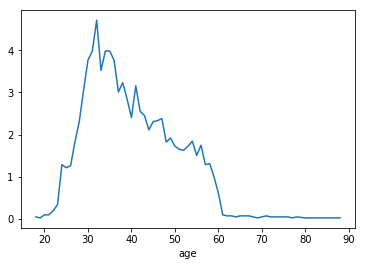

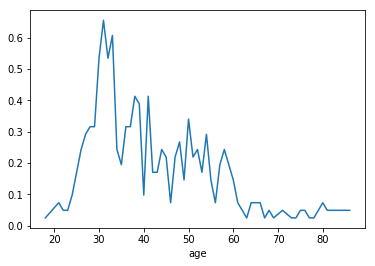

Si può notare che la maggiore percentuale di sottoscrizioni e non avviene nel range di età che va dai 30 ai 40 anni e successivamente la percentuale tende progressivamente a 0


In [6]:
# PUNTO 5
series_age_y = dataset.groupby(['y', 'age']).size()
percentuale_no = (series_age_y['no'] / num_istanze) * 100
percentuale_yes = (series_age_y['yes'] / num_istanze) * 100

percentuale_no.plot()
plt.show()

percentuale_yes.plot()
plt.show()

print('Si può notare che la maggiore percentuale di sottoscrizioni e non avviene nel range di età',
      'che va dai 30 ai 40 anni e successivamente la percentuale tende progressivamente a 0')

In [7]:
# PUNTO 2.1
# Copio il dataset, ora utilizzo dataset_new
# Lo copio perché così posso confrontare le modifiche con il dataset originale

dataset_new = dataset.copy()
dataset_new['y'] = np.where(dataset_new['y'] == 'no', 0, 1)

# Le colonne categoriche sono le uniche che contengono il valore 'unknonw'
columns_name_categoriche = ['job', 'marital','education', 'default', 'housing', 'loan']
for name in columns_name_categoriche:
    dataset_new = dataset_new[dataset_new[name] != 'unknown']
    print(dataset_new[name].unique())

dataset_new = dataset_new.drop(['job', 'marital', 'education'], axis = 1)

# Sostituisco i valori
dataset_new['default'] = np.where(dataset_new['default'] == 'no', 0, 1)
dataset_new['housing'] = np.where(dataset_new['housing'] == 'no', 0, 1)
dataset_new['loan'] = np.where(dataset_new['loan'] == 'no', 0, 1)

print('*' * 100)
print('MOTIVAZIONI')
print('Elimino queste tre colonne perché come si può notare che i valori che assumono sono',
    'molti e poiché la classificazione è boolean (SI - NO) potrebbero influiere negativamente sul classificatore')

['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed']
['married' 'single' 'divorced']
['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'illiterate']
['no' 'yes']
['yes' 'no']
['no' 'yes']
****************************************************************************************************
MOTIVAZIONI
Elimino queste tre colonne perché come si può notare che i valori che assumono sono molti e poiché la classificazione è boolean (SI - NO) potrebbero influiere negativamente sul classificatore


In [8]:
# PUNTO 2.2

Y = dataset_new['y']
X = dataset_new.drop('y', axis = 1)

test_size = 0.25
random_state = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, Y_train)
accuracy_DT = model_DT.score(X_test, Y_test)
# Predict
y_pred_DT = model_DT.predict(X_test)
confusion_matrix_DT = confusion_matrix(Y_test, y_pred_DT)
print('Accuracy  DECISION TREE: {:.03f}'.format(accuracy_DT))
print('Confusion Matrix DECISION TREE:\n{}'.format(confusion_matrix_DT))

Accuracy  DECISION TREE: 0.812
Confusion Matrix DECISION TREE:
[[604  85]
 [ 60  24]]


In [9]:
# PUNTO 2.3
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, Y_train)
accuracy_KNN = model_KNN.score(X_test, Y_test)
# Predict
y_pred_KNN = model_KNN.predict(X_test)
confusion_matrix_KNN = confusion_matrix(Y_test, y_pred_KNN)
print('Accuracy KNeighbors: {:.03f}'.format(accuracy_KNN))
print('Confusion Matrix KNeighbors:\n{}'.format(confusion_matrix_KNN))

Accuracy KNeighbors: 0.872
Confusion Matrix KNeighbors:
[[659  30]
 [ 69  15]]


In [10]:
# PUNTO 2.4

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))

scores = []
cv = 10
scoring = 'accuracy'
for name, model in models:
    score = cross_val_score(model, X, Y, cv = 10, scoring = scoring)
    scores.append(score)
    string = 'Lo score del modello {} è di: {:0.3f} ({:0.3f})'.format(name, score.mean() * 100, 
                                                                      score.std() * 100)
    print(string)

Lo score del modello KNN è di: 80.129 (13.809)
Lo score del modello DT è di: 81.165 (8.031)


In [11]:
# Punto 2.5
numerical = dataset.copy()
numerical = dataset.drop(['job', 'marital', 'education','default', 'housing', 'loan'], axis = 1)

# RICONVERTO LA COLONNA DA PREDIRE
numerical['y'] = np.where(numerical['y'] == 'no', 0, 1)

Y_numerical = numerical['y']
X_numerical = numerical.drop('y', axis = 1)

scores = []
for name, model in models:
    score = cross_val_score(model, X_numerical, Y_numerical, cv = 10, scoring = scoring)
    scores.append(score)
    string = 'Lo score del modello {} è di: {:0.3f} ({:0.3f})'.format(name, score.mean() * 100, 
                                                                      score.std() * 100)
    print(string)

Lo score del modello KNN è di: 71.694 (17.910)
Lo score del modello DT è di: 77.521 (11.103)


In [12]:
# PUNTO 2.6
# Riprendo il dataset originale e rielimino i valori di 'unknown'

numerical_2 = dataset.copy()
# Le colonne categoriche sono le uniche che contengono il valore 'unknonw'
columns_name_categoriche = ['job', 'marital','education', 'default', 'housing', 'loan']

for name in columns_name_categoriche:
    numerical_2 = numerical_2[numerical_2[name] != 'unknown']
    dummies =  pd.get_dummies(numerical_2[name])
    numerical_2 = pd.concat([numerical_2, dummies], axis = 1)
    
numerical_2.drop(columns_name_categoriche, axis = 1, inplace = True)


numerical_2['y'] = np.where(numerical_2['y'] == 'no', 0, 1)

Y_numerical2 = numerical_2['y']
X_numerical2 = numerical_2.drop('y', axis = 1)

scores = []
for name, model in models:
    score = cross_val_score(model, X_numerical2, Y_numerical2, cv = 10, scoring = scoring)
    scores.append(score)
    string = 'Lo score del modello {} è di: {:0.3f} ({:0.3f})'.format(name, score.mean() * 100, 
                                                                      score.std() * 100)
    print(string)

Lo score del modello KNN è di: 80.129 (13.809)
Lo score del modello DT è di: 77.379 (11.035)


In [25]:
# PUNTO 7
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)
accuracy_LR = linear_regression.score(X_test, Y_test)
# Predict
y_pred_LR = linear_regression.predict(X_test)
y_pred_LR = np.where(y_pred_LR < np.mean(y_pred_LR), 0, 1)
confusion_matrix_LR = confusion_matrix(Y_test, y_pred_LR)
print('Accuracy LINEARE REGRESSION: {:.03f}'.format(accuracy_LR))
print('Confusion Matrix DECISION TREE:\n{}'.format(confusion_matrix_LR))

Accuracy LINEARE REGRESSION: 0.118
Confusion Matrix DECISION TREE:
[[447 242]
 [ 20  64]]
